<a href="https://colab.research.google.com/github/Ajit-bit-eng/ML_Assingments/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**

# 1. What is unsupervised learning in the context of machine learning ?

Ans.

Unsupervised learning is a type of machine learning where the model is trained on unlabeled data without predefined categories or labels. The model identifies patterns, structures, or groupings within the data by itself.

# 2. How does K-Means clustering algorithm work ?

Ans.

K-Means clustering partitions data into K clusters by iteratively assigning points to the nearest cluster centroid and updating centroids based on the mean of assigned points until convergence.

# 3. Explain the concept of a dendrogram in hierarchical clustering

Ans.

A dendrogram is a tree-like diagram that illustrates the arrangement of clusters produced by hierarchical clustering. It shows how clusters are merged or split at each stage, with the height of the branches representing the distance or dissimilarity between clusters.

# 4. What is the main difference between K-Means and Hierarchical Clustering

Ans.

K-Means is a flat, partition-based clustering method requiring a predefined number of clusters, while Hierarchical Clustering is a tree-based approach that does not require specifying the number of clusters beforehand.

# 5. What are the advantages of DBSCAN over K-Means

Can find arbitrarily shaped clusters.

Does not require specifying the number of clusters beforehand.

Effectively handles noise and outliers.

# 6. When would you use Silhouette Score in clustering ?

Ans.

To evaluate the quality of clustering by measuring how similar an object is to its own cluster compared to other clusters. A higher Silhouette Score indicates better-defined clusters.

# 7.  What are the limitations of Hierarchical Clustering ?

Ans.

Computationally expensive for large datasets.

Once a merge or split is made, it cannot be undone (no backtracking).

Sensitive to noise and outliers.

# 8. Why is feature scaling important in clustering algorithms like K-Means ?

Ans.

Clustering algorithms rely on distance calculations. Without scaling, features with larger ranges can dominate the distance measure, leading to biased results.

# 9. How does DBSCAN identify noise points

Ans.

Points that do not have enough neighboring points (within a specified radius, ε) to form a dense region are classified as noise points.

# 10. Define inertia in the context of K-Means.

Ans.

Inertia is the sum of squared distances between each data point and the centroid of the cluster to which it belongs. Lower inertia indicates more compact clusters.

# 11.  What is the elbow method in K-Means clustering ?

Ans.

A technique to determine the optimal number of clusters by plotting inertia against the number of clusters. The point where the decrease in inertia slows down significantly is considered the "elbow" point.

# 12.  Describe the concept of "density" in DBSCAN.

Ans.

Density refers to the number of points within a specified radius (ε) around a given point. A region is considered dense if it contains at least a minimum number of points (MinPts).

# 13. Can hierarchical clustering be used on categorical data

Ans.

Yes, but it requires a suitable distance metric, such as Hamming distance or Gower distance, to compare categorical features.

# 14. What does a negative Silhouette Score indicate ?

Ans.

A negative score indicates that a sample is likely assigned to the wrong cluster, as its distance to points in another cluster is shorter than to points in its own cluster.

# 15. Explain the term "linkage criteria" in hierarchical clustering.

Ans.

Linkage criteria determine how the distance between clusters is calculated. Common types include single, complete, average, and Ward's linkage.

# 16.  Why might K-Means clustering perform poorly on data with varying cluster sizes or densities.

Ans.

K-Means assumes clusters are spherical and evenly sized. It struggles with clusters of different sizes, densities, or non-spherical shapes.

# 17. What are the core parameters in DBSCAN, and how do they influence clustering.

Ans.

ε (epsilon): Defines the radius for considering neighborhood points.

MinPts: The minimum number of points required to form a dense region.
Higher ε or lower MinPts results in larger clusters, while lower ε or higher MinPts results in smaller, more granular clusters.

# 18. How does K-Means++ improve upon standard K-Means initialization

Ans.

K-Means++ selects initial centroids in a way that is spread out, reducing the chances of poor clustering results and improving convergence speed.

# 19. What is agglomerative clustering ?

Ans.

A type of hierarchical clustering that starts with each data point as its own cluster and iteratively merges the closest clusters until all points are merged into a single cluster.

# 20. What makes Silhouette Score a better metric than just inertia for model evaluation ?

Ans.

Inertia only measures compactness within clusters, while Silhouette Score also considers how well-separated clusters are, providing a more comprehensive assessment

# **Practical Questions**

# 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.

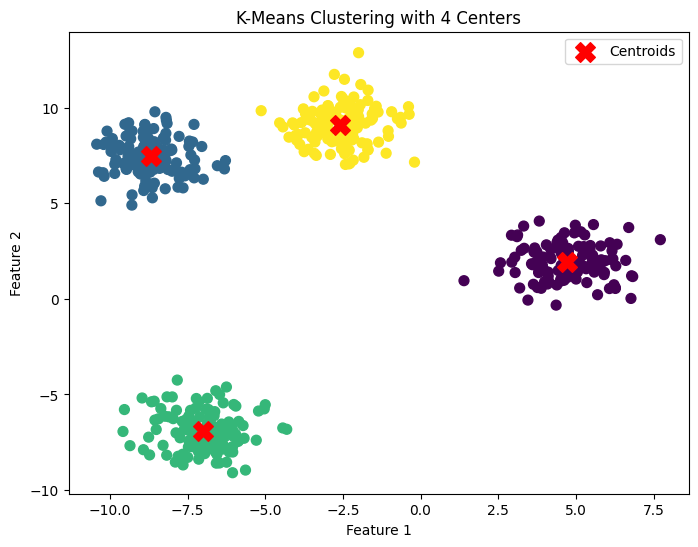

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 4 centers
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# 22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X)

# Display the first 10 predicted labels
print("First 10 Predicted Labels:", labels[:10])


First 10 Predicted Labels: [1 1 1 1 1 1 1 1 1 1]


# 23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

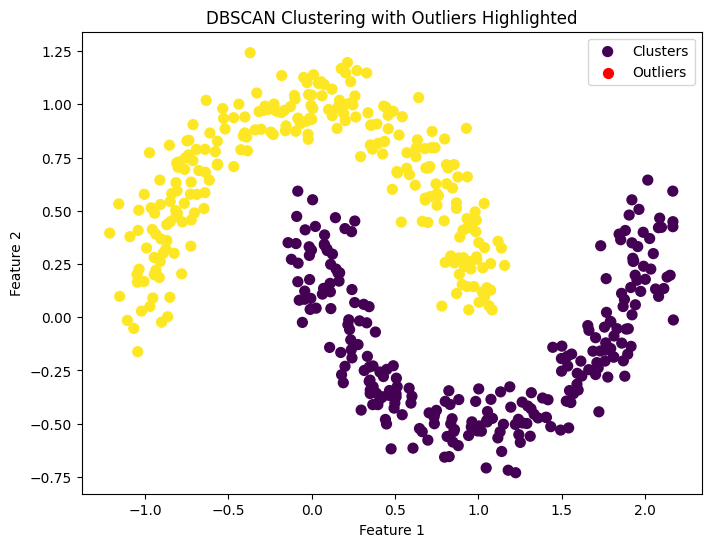

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# Generate synthetic data using make_moons
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify core points, border points, and outliers
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
outliers = (labels == -1)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers], cmap='viridis', s=50, label='Clusters')
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=50, label='Outliers')
plt.title('DBSCAN Clustering with Outliers Highlighted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# 24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Print the size of each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Size of each cluster:", cluster_sizes)


Size of each cluster: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


# 25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

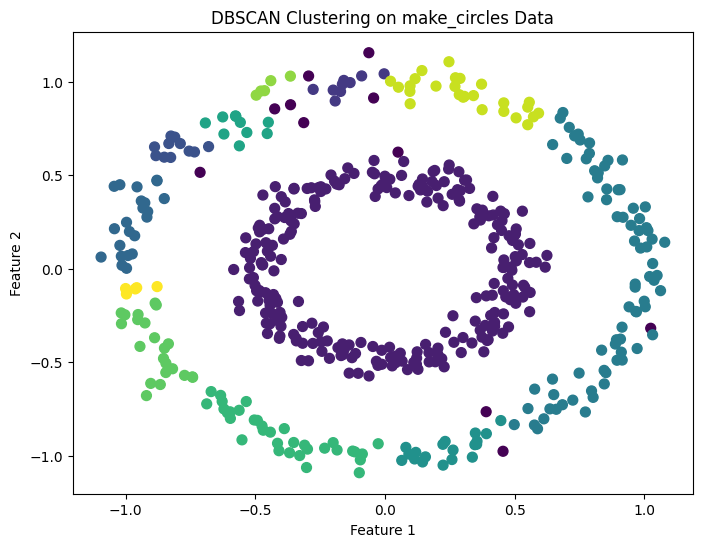

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Generate synthetic data using make_circles
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering on make_circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# 26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Apply MinMaxScaler to scale the features between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Output the cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster Centroids:\n", centroids)


Cluster Centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


# 27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.

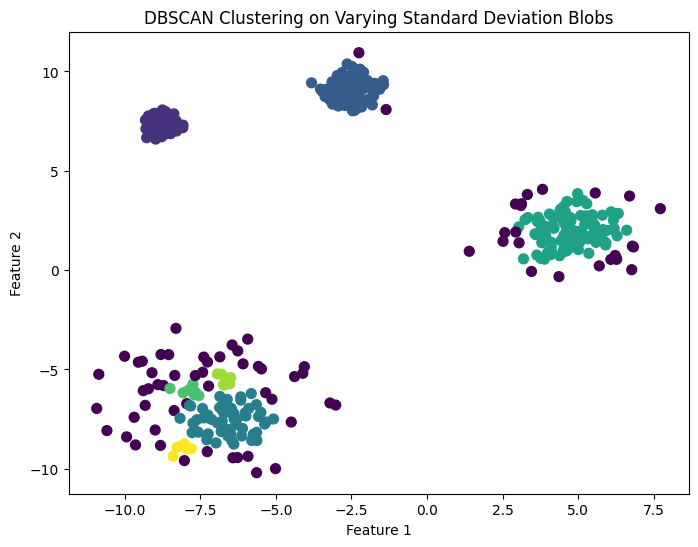

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data with varying cluster standard deviations
X, y = make_blobs(n_samples=500,
                  centers=4,
                  cluster_std=[0.5, 1.0, 1.5, 0.3],
                  random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering on Varying Standard Deviation Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# 28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

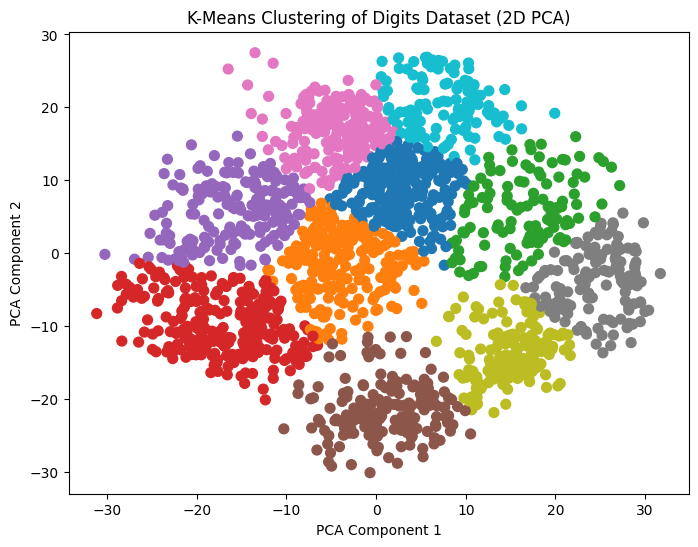

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce the data to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50)
plt.title('K-Means Clustering of Digits Dataset (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# 29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

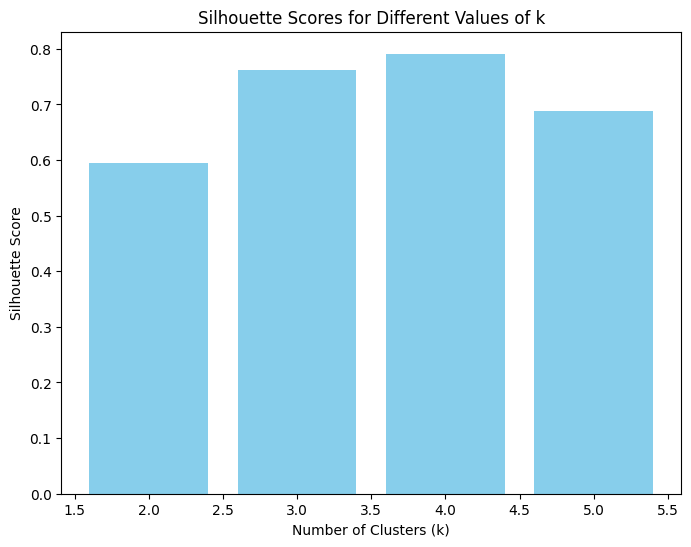

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data with 4 centers
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Evaluate silhouette scores for k = 2 to 5
silhouette_scores = {}
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores[k] = score

# Plot the silhouette scores as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color='skyblue')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


# 30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

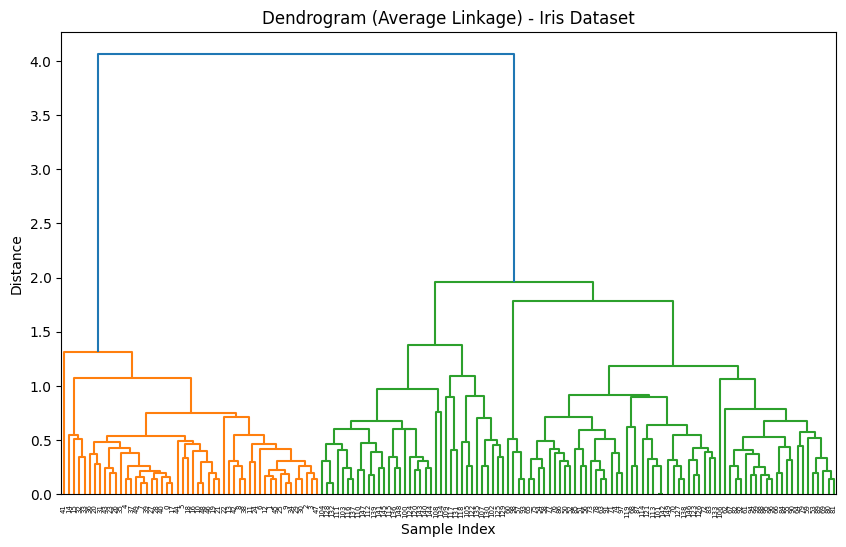

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering using average linkage
Z = linkage(X, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram (Average Linkage) - Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


# 31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.

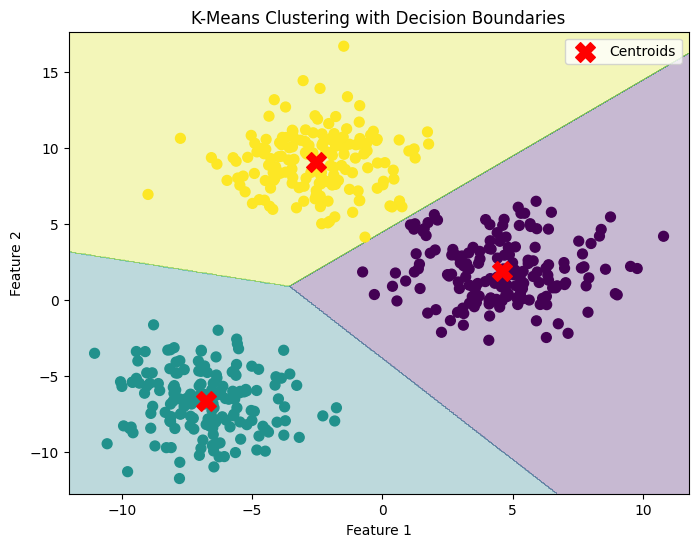

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with overlapping clusters
X, y = make_blobs(n_samples=500, centers=3, cluster_std=2.0, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predicting the cluster labels for each point in the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# 32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

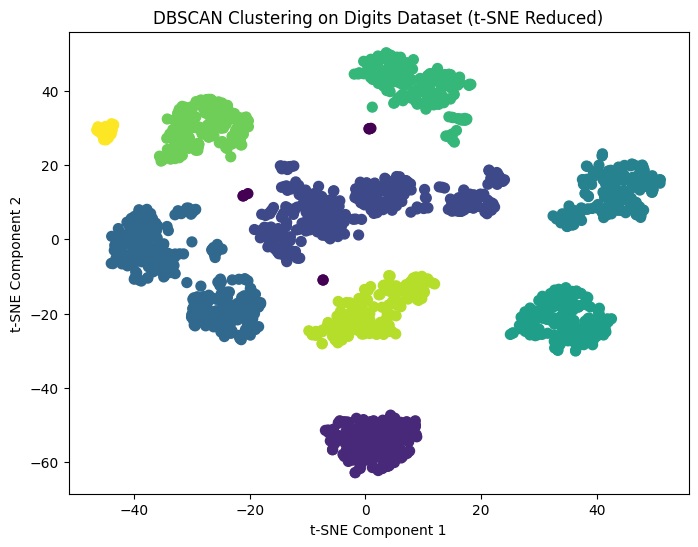

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Plot the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering on Digits Dataset (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


# 33.  Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

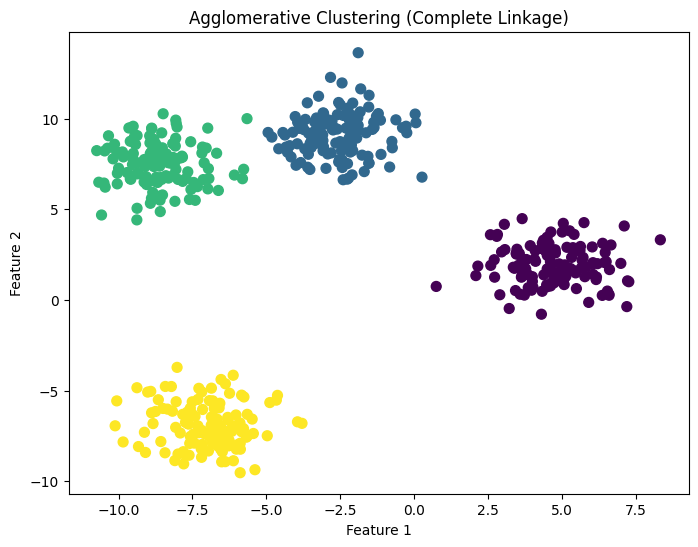

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

# Apply Agglomerative Clustering with complete linkage
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg_clustering.fit_predict(X)

# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering (Complete Linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# 34.  Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.

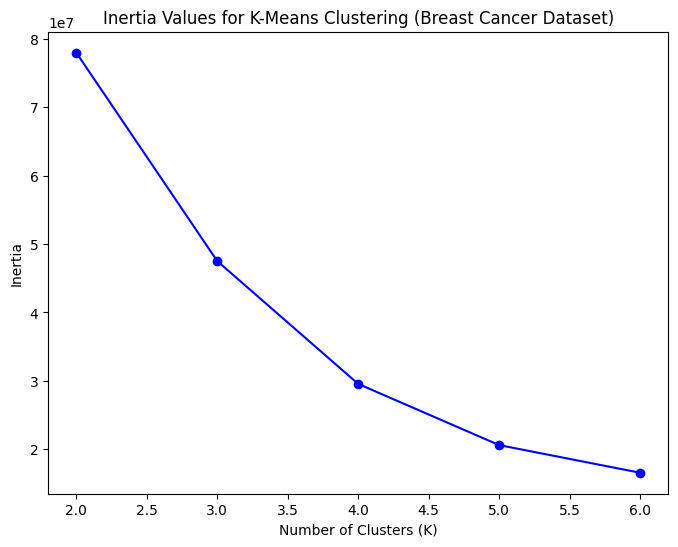

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Calculate inertia for K = 2 to 6
inertia_values = []
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Inertia Values for K-Means Clustering (Breast Cancer Dataset)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


# 35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.

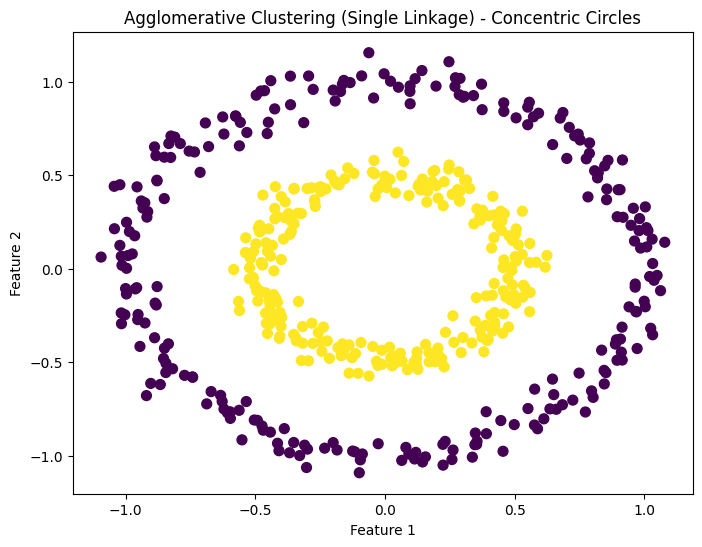

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic concentric circles
X, _ = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# Apply Agglomerative Clustering with single linkage
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg_clustering.fit_predict(X)

# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering (Single Linkage) - Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# 36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

In [16]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
data = load_wine()
X = data.data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count the number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters (excluding noise): {n_clusters}")


Number of clusters (excluding noise): 0


# 37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.

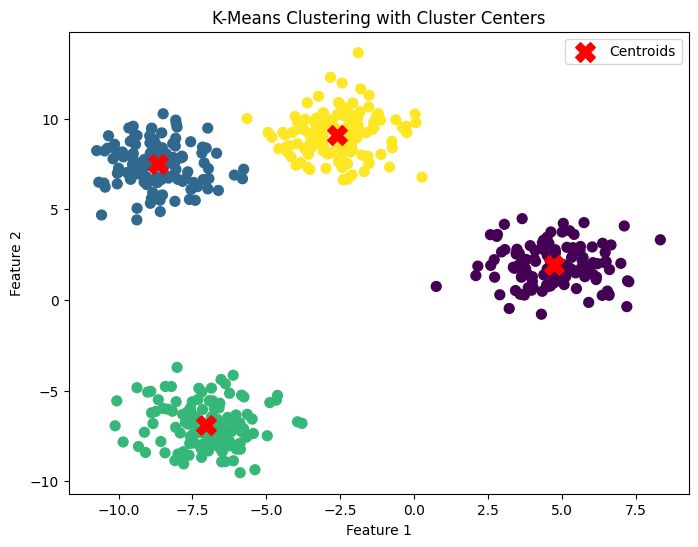

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# 38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

In [18]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count the number of noise samples (labeled as -1)
n_noise = np.sum(labels == -1)

print(f"Number of samples identified as noise: {n_noise}")


Number of samples identified as noise: 34


# 39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.

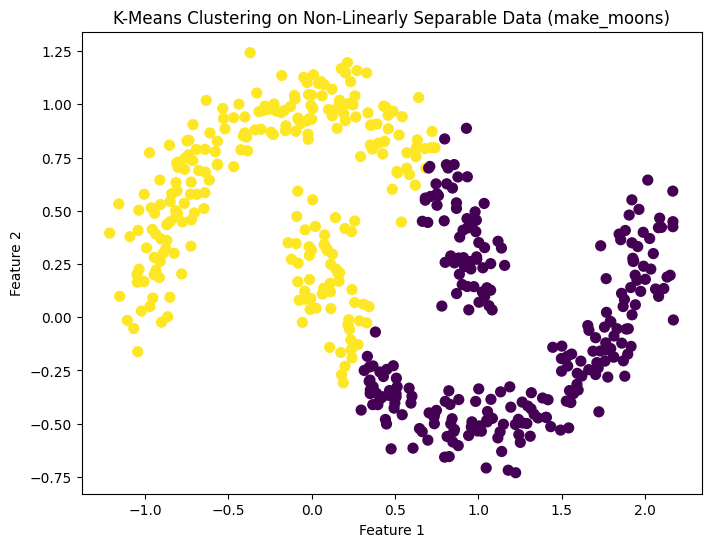

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Generate synthetic non-linearly separable data
X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('K-Means Clustering on Non-Linearly Separable Data (make_moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# 40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

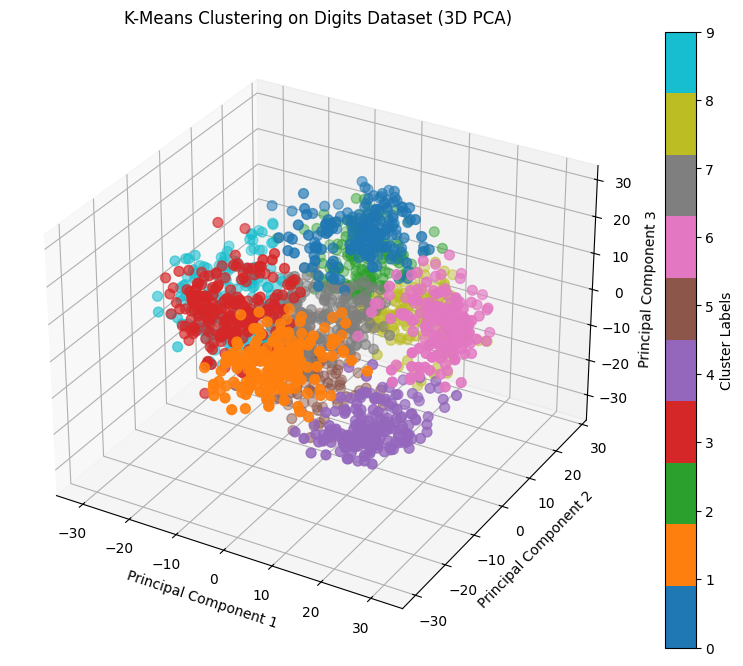

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 3 components using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=50)
ax.set_title('K-Means Clustering on Digits Dataset (3D PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter, ax=ax, label='Cluster Labels')
plt.show()


# 41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.

Silhouette Score: 0.6319


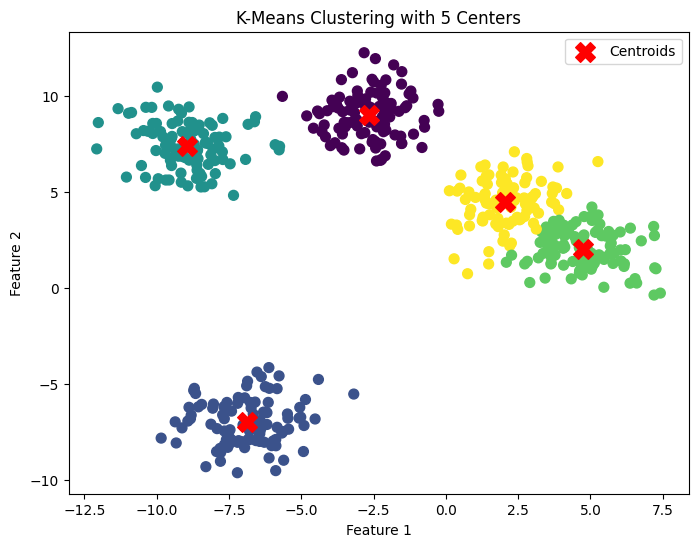

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic blobs with 5 centers
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.2, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate Silhouette Score
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.4f}")

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with 5 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# 42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.

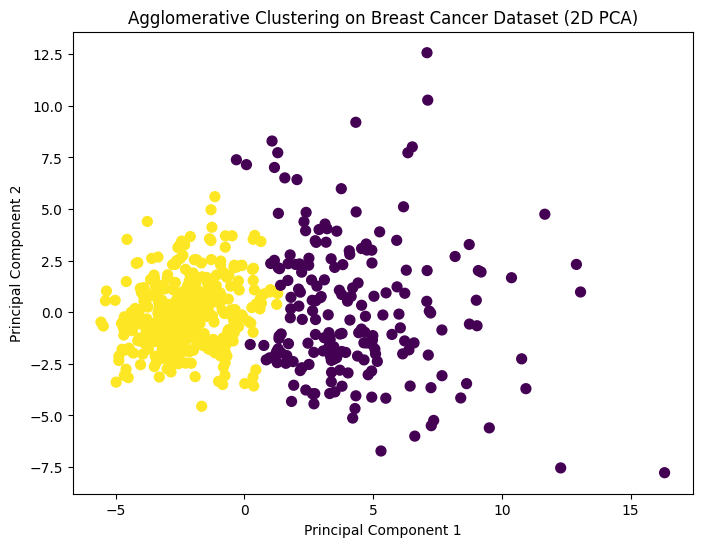

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality using PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(X_pca)

# Plot the clustering result in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering on Breast Cancer Dataset (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# 43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.

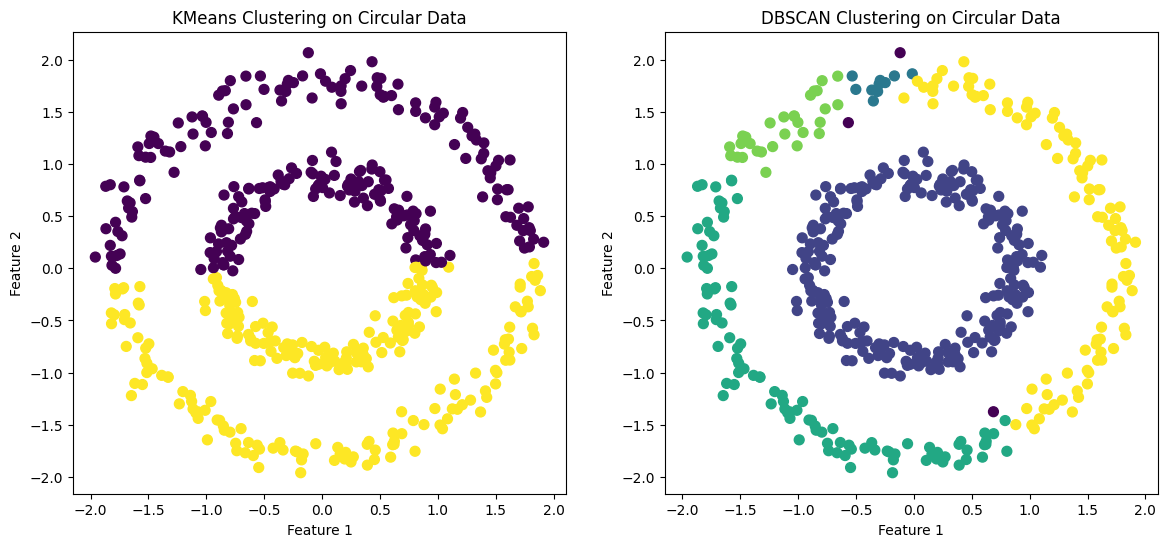

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate noisy circular data
X, _ = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Plot the clustering results side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
ax1.set_title('KMeans Clustering on Circular Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50)
ax2.set_title('DBSCAN Clustering on Circular Data')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.show()


# 44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

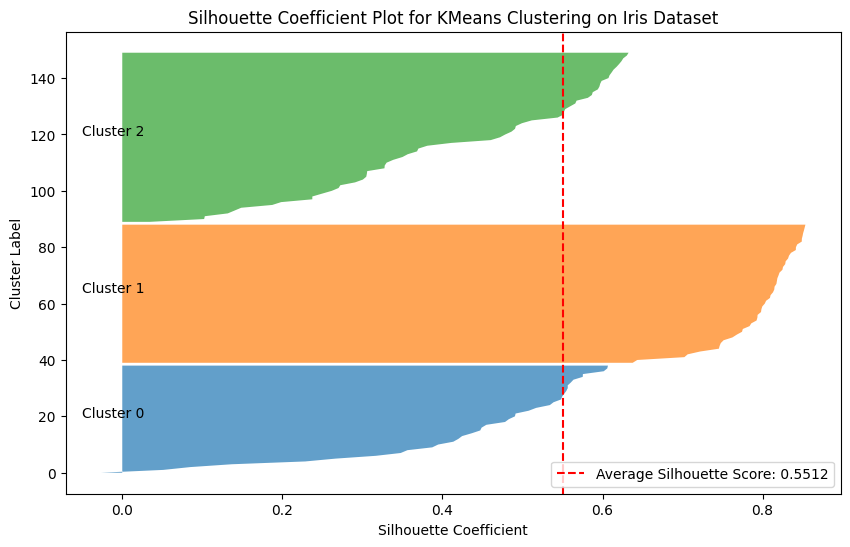

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(X, labels)
silhouette_avg = silhouette_score(X, labels)

# Plotting silhouette coefficients for each sample
plt.figure(figsize=(10, 6))
y_lower = 0
for i in range(3):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    y_lower = y_upper

plt.axvline(x=silhouette_avg, color='red', linestyle='--', label=f'Average Silhouette Score: {silhouette_avg:.4f}')
plt.title('Silhouette Coefficient Plot for KMeans Clustering on Iris Dataset')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster Label')
plt.legend()
plt.show()


# 45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.

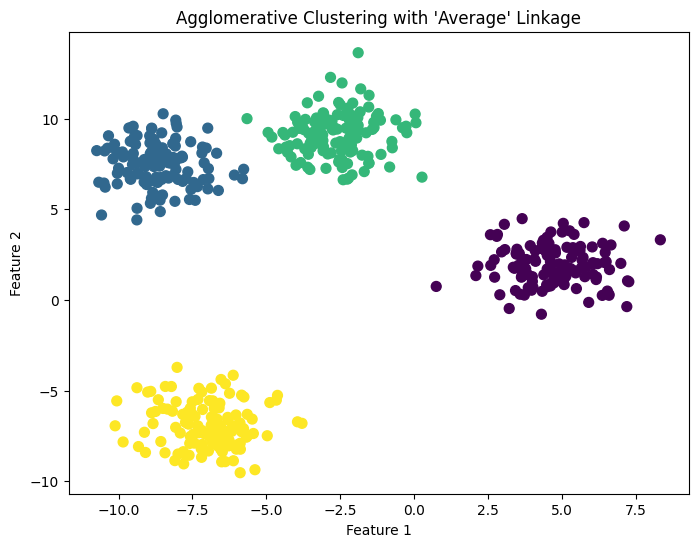

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

# Apply Agglomerative Clustering with 'average' linkage
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg_clustering.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering with 'Average' Linkage")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# 46.  Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

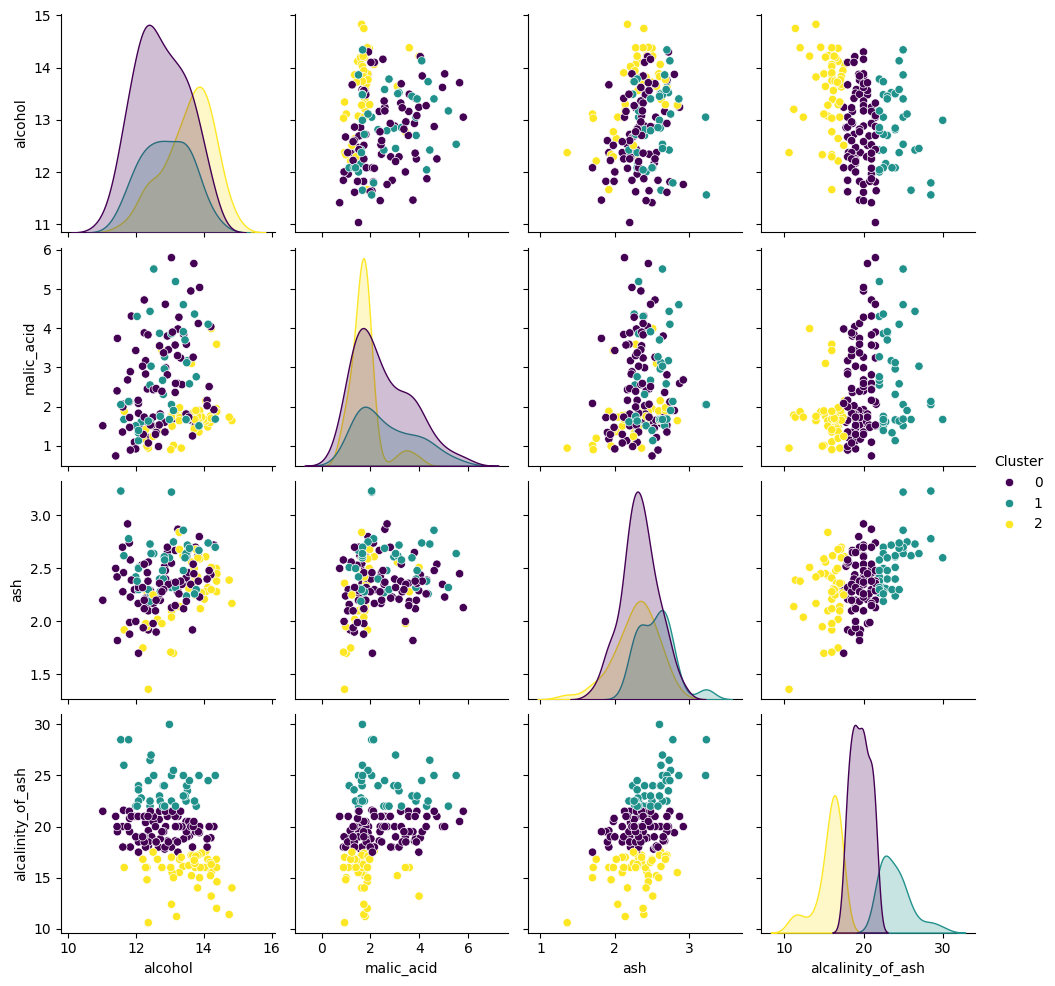

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

# Load the Wine dataset
wine = load_wine()
X = wine.data[:, :4]  # Select the first 4 features
wine_df = pd.DataFrame(X, columns=wine.feature_names[:4])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
wine_df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters using seaborn pairplot
sns.pairplot(wine_df, hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()


# 47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic data with noise
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.5, random_state=42)

# Scale the data
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Count the number of clusters (excluding noise, labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

# Print the counts
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters found: 3
Number of noise points: 3


# 48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

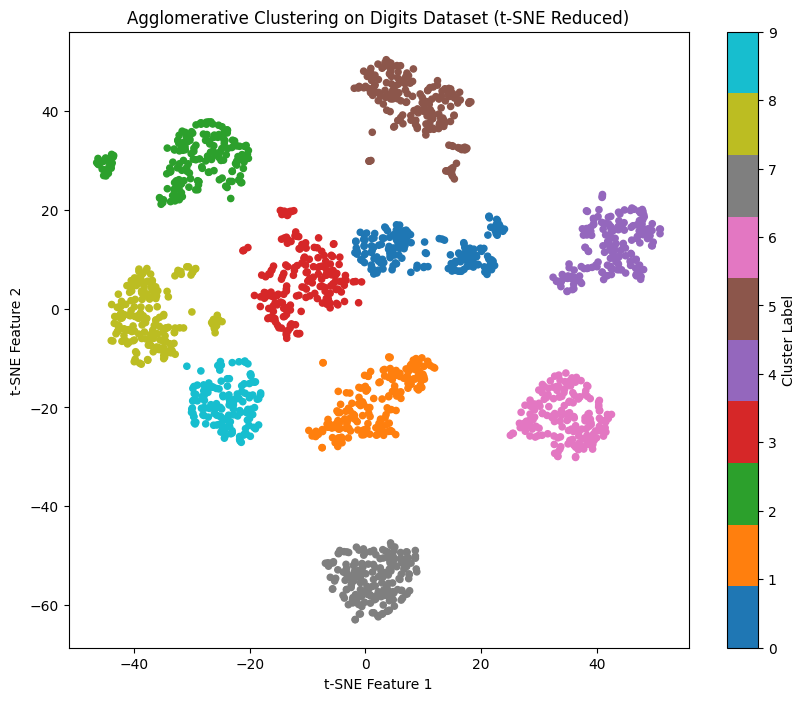

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agg_clustering.fit_predict(X_tsne)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=20)
plt.title('Agglomerative Clustering on Digits Dataset (t-SNE Reduced)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()
